In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from time import time
import matplotlib.pyplot as plt
import matplotlib
import pickle

In [2]:
with open("/content/drive/MyDrive/DACON/물류 유통량 예측 경진대회/data/x_train.pickle","rb") as f:
    x_train = pickle.load(f)

In [3]:
with open("/content/drive/MyDrive/DACON/물류 유통량 예측 경진대회/data/x_test.pickle","rb") as f:
    x_test = pickle.load(f)

In [4]:
with open("/content/drive/MyDrive/DACON/물류 유통량 예측 경진대회/data/x_train_dummies.pkl","rb") as f:
    x_train_dummies = pickle.load(f)

In [5]:
with open("/content/drive/MyDrive/DACON/물류 유통량 예측 경진대회/data/x_test_dummies.pkl","rb") as f:
    x_test_dummies = pickle.load(f)

In [6]:
x_train_dummies.shape, x_test_dummies.shape

((32000, 78), (4640, 77))

In [7]:
x_train_dummies = x_train_dummies.iloc[:, 2:]
x_test_dummies = x_test_dummies.iloc[:, 2:]

### 4) pycaret

In [8]:
! pip install pycaret

In [9]:
from pycaret.utils import version
version()

'2.3.5'

In [10]:
from pycaret.regression import *

cell_start_time = time()
reg = setup(data = x_train_dummies, 
             target = 'INVC_CONT',
             session_id = 777,
             #pca = True,
             #create_clusters=True,
             #cluster_iter = 50,
             #numeric_imputation = 'mean',
             normalize = True,
             silent = True)
cell_end_time = time()
print("CELL RUN TIME : ",cell_end_time - cell_start_time)

,Description,Value
0,session_id,777
1,Target,INVC_CONT
2,Original Data,"(32000, 76)"
3,Missing Values,False
4,Numeric Features,74
5,Categorical Features,1
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(22399, 68)"


CELL RUN TIME :  2.011766195297241


#### - top5 모델 생성

In [11]:
top5 = compare_models(fold = 10, sort = 'rmse', n_select = 5, round=4)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
gbr,Gradient Boosting Regressor,2.136300e+00,2.702370e+01,5.155400e+00,3.700000e-02,0.4082,4.160000e-01,2.388
br,Bayesian Ridge,2.144200e+00,2.705410e+01,5.158200e+00,3.610000e-02,0.4092,4.174000e-01,0.252
ridge,Ridge Regression,2.145500e+00,2.711020e+01,5.163400e+00,3.420000e-02,0.4106,4.176000e-01,0.065
lr,Linear Regression,2.145300e+00,2.711260e+01,5.163500e+00,3.420000e-02,0.4106,4.176000e-01,0.483
omp,Orthogonal Matching Pursuit,2.149500e+00,2.713010e+01,5.165600e+00,3.330000e-02,0.4102,4.185000e-01,0.073
lightgbm,Light Gradient Boosting Machine,2.149100e+00,2.722800e+01,5.178800e+00,2.670000e-02,0.4128,4.176000e-01,0.270
en,Elastic Net,2.176600e+00,2.752220e+01,5.202400e+00,1.960000e-02,0.4097,4.263000e-01,0.070
lasso,Lasso Regression,2.205300e+00,2.806400e+01,5.253600e+00,1.000000e-04,0.4172,4.327000e-01,0.066
dummy,Dummy Regressor,2.206000e+00,2.807230e+01,5.254500e+00,-2.000000e-04,0.4173,4.329000e-01,0.033
llar,Lasso Least Angle Regression,2.206000e+00,2.807230e+01,5.254500e+00,-2.000000e-04,0.4173,4.329000e-01,0.079


In [12]:
top5

[GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                           init=None, learning_rate=0.1, loss='ls', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=777, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0, warm_start=False),
 BayesianRidge(alpha_1=1e-06, alpha_2=1e-06, alpha_init=None,
               compute_score=False, copy_X=True, fit_intercept=True,
               lambda_1=1e-06, lambda_2=1e-06, lambda_init=None, n_iter=300,
               normalize=False, tol=0.001, verbose=False),
 Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_ite

#### - 앙상블 적용

In [13]:
blended = blend_models(estimator_list = top5, fold = 10, optimize = 'RMSE')
pred_holdout = predict_model(blended)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,2.1000,22.5310,4.7467,0.0203,0.4070,0.4245
1,2.1518,21.8023,4.6693,0.0386,0.4106,0.4215
2,2.0987,21.4071,4.6268,0.0639,0.4019,0.4169
3,2.0335,18.5972,4.3125,0.0285,0.3999,0.4196
4,2.3202,42.7654,6.5395,0.0414,0.4250,0.4251
5,2.1669,23.4011,4.8375,0.0396,0.4166,0.4142
6,2.1027,34.6089,5.8829,0.0302,0.4020,0.4156
7,2.1151,26.0032,5.0993,0.0376,0.4058,0.4032
8,2.1897,34.4352,5.8682,0.0295,0.4145,0.4112
9,2.1143,24.6299,4.9629,0.0452,0.4035,0.4124


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Voting Regressor,2.2412,43.0687,6.5627,0.0381,0.4178,0.4143


In [17]:
custom_model = compare_models(fold = 10, sort = 'rmse', n_select = 3, include=['gbr','br' ,'ridge'])

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
gbr,Gradient Boosting Regressor,2.1363,27.0237,5.1554,0.0370,0.4082,0.4160,2.671
br,Bayesian Ridge,2.1442,27.0541,5.1582,0.0361,0.4092,0.4174,0.158
ridge,Ridge Regression,2.1455,27.1102,5.1634,0.0342,0.4106,0.4176,0.045


In [18]:
blended_custom = blend_models(estimator_list = custom_model, fold = 10, optimize = 'rmse')
pred_holdout_custom = predict_model(blended_custom)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,2.1008,22.5480,4.7485,0.0195,0.4074,0.4249
1,2.1484,21.7396,4.6626,0.0414,0.4099,0.4209
2,2.0953,21.3597,4.6217,0.0659,0.4015,0.4165
3,2.0307,18.5708,4.3094,0.0299,0.3994,0.4191
4,2.3203,42.6710,6.5323,0.0435,0.4251,0.4253
5,2.1634,23.3360,4.8307,0.0423,0.4157,0.4135
6,2.0979,34.5479,5.8777,0.0319,0.4013,0.4144
7,2.1138,25.9853,5.0976,0.0383,0.4053,0.4031
8,2.1885,34.4742,5.8715,0.0284,0.4146,0.4109
9,2.1122,24.6184,4.9617,0.0457,0.4032,0.4121


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Voting Regressor,2.2389,42.9843,6.5562,0.04,0.4172,0.4138


#### - 스테킹

In [19]:
stacking = stack_models(estimator_list = top5, fold = 10, optimize = 'RMSE')
stacking_pred_holdout = predict_model(stacking)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,2.1104,22.6305,4.7571,0.0160,0.4094,0.4278
1,2.1513,21.7340,4.6620,0.0416,0.4110,0.4224
2,2.0993,21.3921,4.6252,0.0645,0.4027,0.4174
3,2.0314,18.6429,4.3177,0.0262,0.4017,0.4192
4,2.3247,42.6826,6.5332,0.0433,0.4264,0.4266
5,2.1682,23.3070,4.8277,0.0435,0.4166,0.4151
6,2.1045,34.7343,5.8936,0.0267,0.4039,0.4158
7,2.1184,26.0276,5.1017,0.0367,0.4066,0.4045
8,2.1902,34.5355,5.8767,0.0267,0.4156,0.4115
9,2.1148,24.6702,4.9669,0.0436,0.4042,0.4129


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Stacking Regressor,2.2441,42.9221,6.5515,0.0414,0.4183,0.4156


In [20]:
stacking_custom = stack_models(estimator_list = custom_model, fold = 10, optimize = 'rmse')
stacking_pred_holdout_custom = predict_model(blended_custom)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,2.1104,22.6340,4.7575,0.0158,0.4095,0.4277
1,2.1512,21.7312,4.6617,0.0417,0.4109,0.4224
2,2.0992,21.3910,4.6250,0.0646,0.4028,0.4173
3,2.0314,18.6273,4.3159,0.0270,0.4014,0.4192
4,2.3247,42.6826,6.5332,0.0433,0.4264,0.4266
5,2.1681,23.3070,4.8277,0.0435,0.4166,0.4150
6,2.1044,34.7475,5.8947,0.0264,0.4039,0.4157
7,2.1185,26.0274,5.1017,0.0367,0.4066,0.4045
8,2.1906,34.5337,5.8765,0.0267,0.4156,0.4116
9,2.1150,24.6782,4.9677,0.0433,0.4042,0.4130


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Voting Regressor,2.2389,42.9843,6.5562,0.04,0.4172,0.4138


In [21]:
stacking_tuned = tune_model(stacking, optimize="rmse")

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,2.1104,22.6305,4.7571,0.0160,0.4094,0.4278
1,2.1513,21.7340,4.6620,0.0416,0.4110,0.4224
2,2.0993,21.3921,4.6252,0.0645,0.4027,0.4174
3,2.0314,18.6429,4.3177,0.0262,0.4017,0.4192
4,2.3247,42.6826,6.5332,0.0433,0.4264,0.4266
5,2.1682,23.3070,4.8277,0.0435,0.4166,0.4151
6,2.1045,34.7343,5.8936,0.0267,0.4039,0.4158
7,2.1184,26.0276,5.1017,0.0367,0.4066,0.4045
8,2.1902,34.5355,5.8767,0.0267,0.4156,0.4115
9,2.1148,24.6702,4.9669,0.0436,0.4042,0.4129


In [23]:
stacking_tuned_predict = predict_model(stacking_tuned)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Stacking Regressor,2.2441,42.9221,6.5515,0.0414,0.4183,0.4156


In [25]:
# 최종모델
final_model = finalize_model(stacking_tuned)

In [29]:
x_train_dummies.head()

,TREND_SCORE,DL_GD_LCLS_NM_mean,DL_GD_LCLS_NM_std,DL_GD_MCLS_NM_mean,DL_GD_MCLS_NM_std,SEND_시도_mean,SEND_시도_std,REC_시도_mean,REC_시도_std,PATH_mean,PATH_std,SEND_격자공간명_대_mean,SEND_격자공간명_대_std,REC_격자공간명_대_mean,REC_격자공간명_대_std,INVC_CONT,DL_GD_LCLS_NM_디지털/가전,DL_GD_LCLS_NM_생활/건강,DL_GD_LCLS_NM_식품,DL_GD_LCLS_NM_여행/문화,DL_GD_LCLS_NM_패션의류,DL_GD_LCLS_NM_화장품/미용,DL_GD_MCLS_NM_가공식품,DL_GD_MCLS_NM_건강식품,DL_GD_MCLS_NM_건강용품,DL_GD_MCLS_NM_과자,DL_GD_MCLS_NM_기타디지털/가전,DL_GD_MCLS_NM_기타식품,DL_GD_MCLS_NM_기타패션의류,DL_GD_MCLS_NM_냉동/간편조리식품,DL_GD_MCLS_NM_농산물,DL_GD_MCLS_NM_문구/사무용품,DL_GD_MCLS_NM_문화컨텐츠,DL_GD_MCLS_NM_반려동물,DL_GD_MCLS_NM_상의,DL_GD_MCLS_NM_생활용품,DL_GD_MCLS_NM_수산,DL_GD_MCLS_NM_스킨케어,DL_GD_MCLS_NM_음료,DL_GD_MCLS_NM_음반,DL_GD_MCLS_NM_주방용품,DL_GD_MCLS_NM_축산,SEND_시도_강원도,SEND_시도_경기도,SEND_시도_경상남도,SEND_시도_경상북도,SEND_시도_광주광역시,SEND_시도_대구광역시,SEND_시도_대전광역시,SEND_시도_부산광역시,SEND_시도_서울특별시,SEND_시도_세종특별자치시,SEND_시도_울산광역시,SEND_시도_인천광역시,SEND_시도_전라남도,SEND_시도_전라북도,SEND_시도_제주특별자치도,SEND_시도_충청남도,SEND_시도_충청북도,REC_시도_강원도,REC_시도_경기도,REC_시도_경상남도,REC_시도_경상북도,REC_시도_광주광역시,REC_시도_대구광역시,REC_시도_대전광역시,REC_시도_부산광역시,REC_시도_서울특별시,REC_시도_세종특별자치시,REC_시도_울산광역시,REC_시도_인천광역시,REC_시도_전라남도,REC_시도_전라북도,REC_시도_제주특별자치도,REC_시도_충청남도,REC_시도_충청북도
0,82,6.678694,19.133327,3.672897,1.778917,5.629802,8.171121,5.806966,9.208857,5.803185,9.267915,5.683737,9.788186,6.24925,11.579286,3.0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,100,5.407921,6.667207,4.444134,3.051556,5.629802,8.171121,5.806966,9.208857,5.803185,9.267915,5.683737,9.788186,6.24925,11.579286,3.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,82,6.678694,19.133327,10.375479,28.094292,5.629802,8.171121,5.806966,9.208857,5.803185,9.267915,5.683737,9.788186,6.24925,11.579286,9.0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,52,4.658195,4.961598,4.297401,3.703223,5.629802,8.171121,5.806966,9.208857,5.803185,9.267915,5.683737,9.788186,6.24925,11.579286,10.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
4,52,4.658195,4.961598,6.807151,11.128790,5.629802,8.171121,5.806966,9.208857,5.803185,9.267915,5.683737,9.788186,6.24925,11.579286,3.0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [31]:
# validation용
test_pred = predict_model(final_model, data=x_train_dummies.iloc[-5000:])

from pycaret.utils import check_metric
check_metric(test_pred['INVC_CONT'], test_pred['Label'], metric = 'RMSE')

5.5452

In [32]:
test_pred = predict_model(final_model, data=x_train_dummies.iloc[-15000:])

from pycaret.utils import check_metric
check_metric(test_pred['INVC_CONT'], test_pred['Label'], metric = 'RMSE')

5.3877

In [34]:
test_pred = predict_model(final_model, data=x_train_dummies.iloc[-25000:-20000])

from pycaret.utils import check_metric
check_metric(test_pred['INVC_CONT'], test_pred['Label'], metric = 'RMSE')

5.4324

In [35]:
prep_pipe = get_config("prep_pipe")
prep_pipe

Pipeline(memory=None,
         steps=[('dtypes',
                 DataTypes_Auto_infer(categorical_features=[],
                                      display_types=False, features_todrop=[],
                                      id_columns=[], ml_usecase='regression',
                                      numerical_features=[], target='INVC_CONT',
                                      time_features=[])),
                ('imputer',
                 Simple_Imputer(categorical_strategy='not_available',
                                fill_value_categorical=None,
                                fill_value_numerical=None,
                                numeric_strat...
                ('P_transform', 'passthrough'), ('binn', 'passthrough'),
                ('rem_outliers', 'passthrough'), ('cluster_all', 'passthrough'),
                ('dummy', Dummify(target='INVC_CONT')),
                ('fix_perfect', Remove_100(target='INVC_CONT')),
                ('clean_names', Clean_Colum_Names(

In [36]:
prep_pipe.steps.append(['trained_model', final_model])

In [37]:
prections = prep_pipe.predict(x_test_dummies)
prections

array([4.12179184, 4.12179184, 4.21250153, ..., 4.64451599, 4.21250153,
       4.90478516])

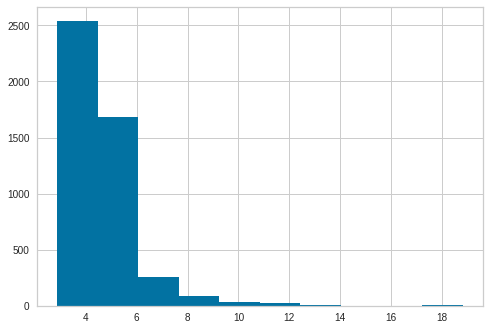

In [38]:
prections = pd.DataFrame(prections)
prections[0].hist()

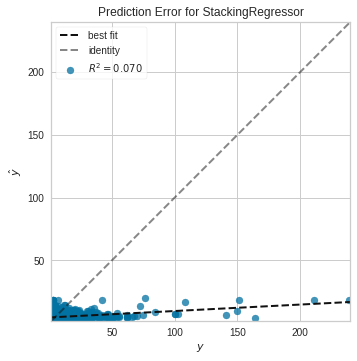

In [39]:
plot_model(final_model, plot = 'error')

In [40]:
submission = pd.read_csv('/content/drive/MyDrive/DACON/물류 유통량 예측 경진대회/data/sample_submission.csv')
submission

,index,INVC_CONT
0,32000,0
1,32001,0
2,32002,0
3,32003,0
4,32004,0
...,...,...
4635,36635,0
4636,36636,0
4637,36637,0
4638,36638,0


In [41]:
submission['INVC_CONT'] = prections[0]
submission

,index,INVC_CONT
0,32000,4.121792
1,32001,4.121792
2,32002,4.212502
3,32003,4.291111
4,32004,4.223732
...,...,...
4635,36635,4.736191
4636,36636,4.165295
4637,36637,4.644516
4638,36638,4.212502


In [42]:
submission.to_csv('/content/drive/MyDrive/DACON/물류 유통량 예측 경진대회/submission/pycaret_result_staking_tuned_211215.csv', index=False)